# Especificação:
## Este é um projeto de DataScience desenvolvido pelo aluno Vitor Alexandrino, para a disciplina CAP394 - Introdução à Data Science, ministrada pelo Professor Rafael Santos no INPE
### Conjunto de dados:
Os dados que aqui serão analisados estão disponíveis para download em https://github.com/vitorAlexandrino/projeto394 sob o nome de: "googleplaystore.csv", e contém um conjunto de informções sobre  cerca de 10 mil aplicativos disponíveis na Google play Store,estas informações estão inicialmente distribuidos em 14 columas, com dados como a categoria que pertence, avaliação média de seus usuários, quantidade de downloads, etc.

### Perguntas que se pretende responder.
1- Qual o preço que maximiza o lucro de seu aplicativo? (Esta pergunta se refere somente aos aplicativos pagos)

2- Qual a categoria de aplicativo mais lucrativa?

3- Quanto o tamanho do aplicativo influencia na sua avaliação?

4- Quanto o preço do aplicativo influencia na sua avaliação média? (Esta pergunta se refere somente aos aplicativos pagos)

5- Quanto a avaliação média influencia na quantidade de downloads? (Existem aplicativos com avaliações ruins, mas mesmo assim uma quantidade grande de downloads?)

6- Qual o tamanho mais aceito para cada categoria de aplicativo?

7- Qual a categoria que recebe mais avaliações?

8- Qual a categoria melhor avaliada?

9- Qual a melhor estratégia de preço para cada categoria?

In [1]:
#foi necessário instalar os pacotes ploty e cofflinks na base do anaconda

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

## Uma amostra do conjunto de dados

In [3]:
df = pd.read_csv('googleplaystore.csv')

df.drop_duplicates(subset='App', inplace=True)
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']


In [4]:
print('numero de aplicativos no conjunto de dados : ' , len(df))
df.sample(7)

numero de aplicativos no conjunto de dados :  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3667,Video Downloader,VIDEO_PLAYERS,4.2,59089,5.4M,"10,000,000+",Free,0,Everyone,Video Players & Editors,"August 3, 2018",1.0.8,4.4 and up
7569,CM S Pen Add-on(ROOT),TOOLS,3.6,373,122k,"10,000+",Free,0,Everyone,Tools,"February 24, 2017",1.0.9,4.1 and up
10554,PRO MX MOTOCROSS 2,GAME,3.8,25275,21M,"5,000,000+",Free,0,Everyone,Racing,"August 11, 2017",1.10,2.3 and up
5560,Augment - 3D Augmented Reality,BUSINESS,4.1,25195,21M,"1,000,000+",Free,0,Everyone,Business,"February 26, 2018",v3.4.0-3,4.0.3 and up
6122,BF Family user,BUSINESS,NaN,8,26M,100+,Free,0,Everyone,Business,"February 1, 2018",0.0.9,4.1 and up
5836,camera zoom moon,PHOTOGRAPHY,3.7,1213,1.1M,"500,000+",Free,0,Everyone,Photography,"January 23, 2018",1.06,2.3 and up
1936,DEAD TARGET: FPS Zombie Apocalypse Survival Games,GAME,4.5,1468591,Varies with device,"50,000,000+",Free,0,Mature 17+,Action,"July 23, 2018",Varies with device,Varies with device


Limpando os dados, e tirando as colunas que não serão usadas para responder as perguntas.

In [5]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
df = df.drop('Last Updated', axis = 1)
df = df.drop('Current Ver', axis = 1)
df = df.drop('Android Ver', axis = 1)
#tem aplicativo que tem mais de uma categoria, como fazer para contabilizar nas duas?

In [6]:

df.sample(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
9474,Pregnant Mom Surgery Newborn Twins Baby Birth ...,FAMILY,4.3,95,28M,10000,Free,0,Teen,Educational
4981,Emo Ads Blocker Browser,TOOLS,3.4,1555,4.1M,100000,Free,0,Everyone,Tools
8770,Dr. Rocket,GAME,4.0,42182,3.4M,1000000,Free,0,Everyone,Arcade
9207,Bihar Land Records - RoR and EB Quick Pay,TOOLS,4.0,8,2.2M,1000,Free,0,Everyone,Tools
9687,Masha and the Bear: Good Night!,FAMILY,4.6,29155,83M,1000000,Free,0,Everyone,Educational;Pretend Play
4161,G-Playlists,TOOLS,1.8,53,3.4M,1000,Paid,1.49,Everyone,Tools
9402,Lie Detector Prank,FAMILY,3.9,80313,3.7M,10000000,Free,0,Everyone,Casual
2276,Visual Anatomy 2,MEDICAL,4.4,576,Varies with device,5000,Paid,2.49,Everyone,Medical
9278,EF Parеnts,FAMILY,4.1,435,17M,50000,Free,0,Everyone,Education
3614,Rainbow - Journal & Activities,PARENTING,4.8,6668,20M,100000,Free,0,Everyone,Parenting


## 1- Qual o preço que maximiza o lucro de seu aplicativo? (Esta pergunta se refere somente aos aplicativos pagos)
### Para tentar responder esta pergunta será necessário contabilizar somente os aplicativos pagos, e gerar um gráfico de eixos (preço) x (preço x quantidade de downloads).
#### 1.transformar os preços e a quantidade de downloads em valores numéricos, pois estão no formato "String"
#### 2. criar uma coluna com o preço x quantidade de downloads

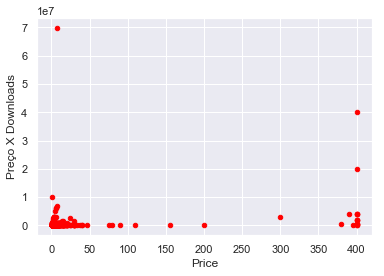

In [7]:
df_pagos = df
#print(type(df_pagos.Price[10])) # imprimi para ver o formato
df_pagos['Price'] = pd.to_numeric(df_pagos['Price'])
df_pagos['Installs'] = pd.to_numeric(df_pagos['Installs'])
#print(type(df_pagos.Price[10])) # imprimi para confirmar o formato
df_pagos = df_pagos.loc[(df['Price']>0)]

df_pagos['Preço X Downloads'] = df_pagos["Price"].mul(df_pagos['Installs'])

df_pagos.plot(kind='scatter',x='Price',y='Preço X Downloads',color='red')
plt.show()

#print('Número de aplicativos pagos', len(df_pagos))
#df_pagos.sample(100)

### Dá pra ver que, por causa de alguns aplicativos com preços e downloads fora do normal, fica difícil a extração de uma informação útil. Vou retirar esses valores irregulares e plotar novamente.